In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mms_train = MinMaxScaler()
mms_test = MinMaxScaler()
X_train_scaled = mms_train.fit_transform(X_train)
X_test_scaled1 = mms_test.fit_transform(X_test)
X_test_scaled2 = mms_train.transform(X_test)

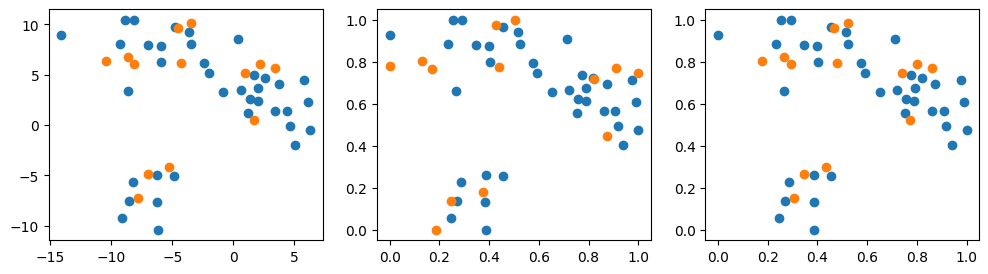

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3)) # 1행 3열 그래프 만들기

axes[0].scatter(X_train[:, 0], X_train[:, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1])

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1])

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1])

plt.show()

In [8]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()
X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

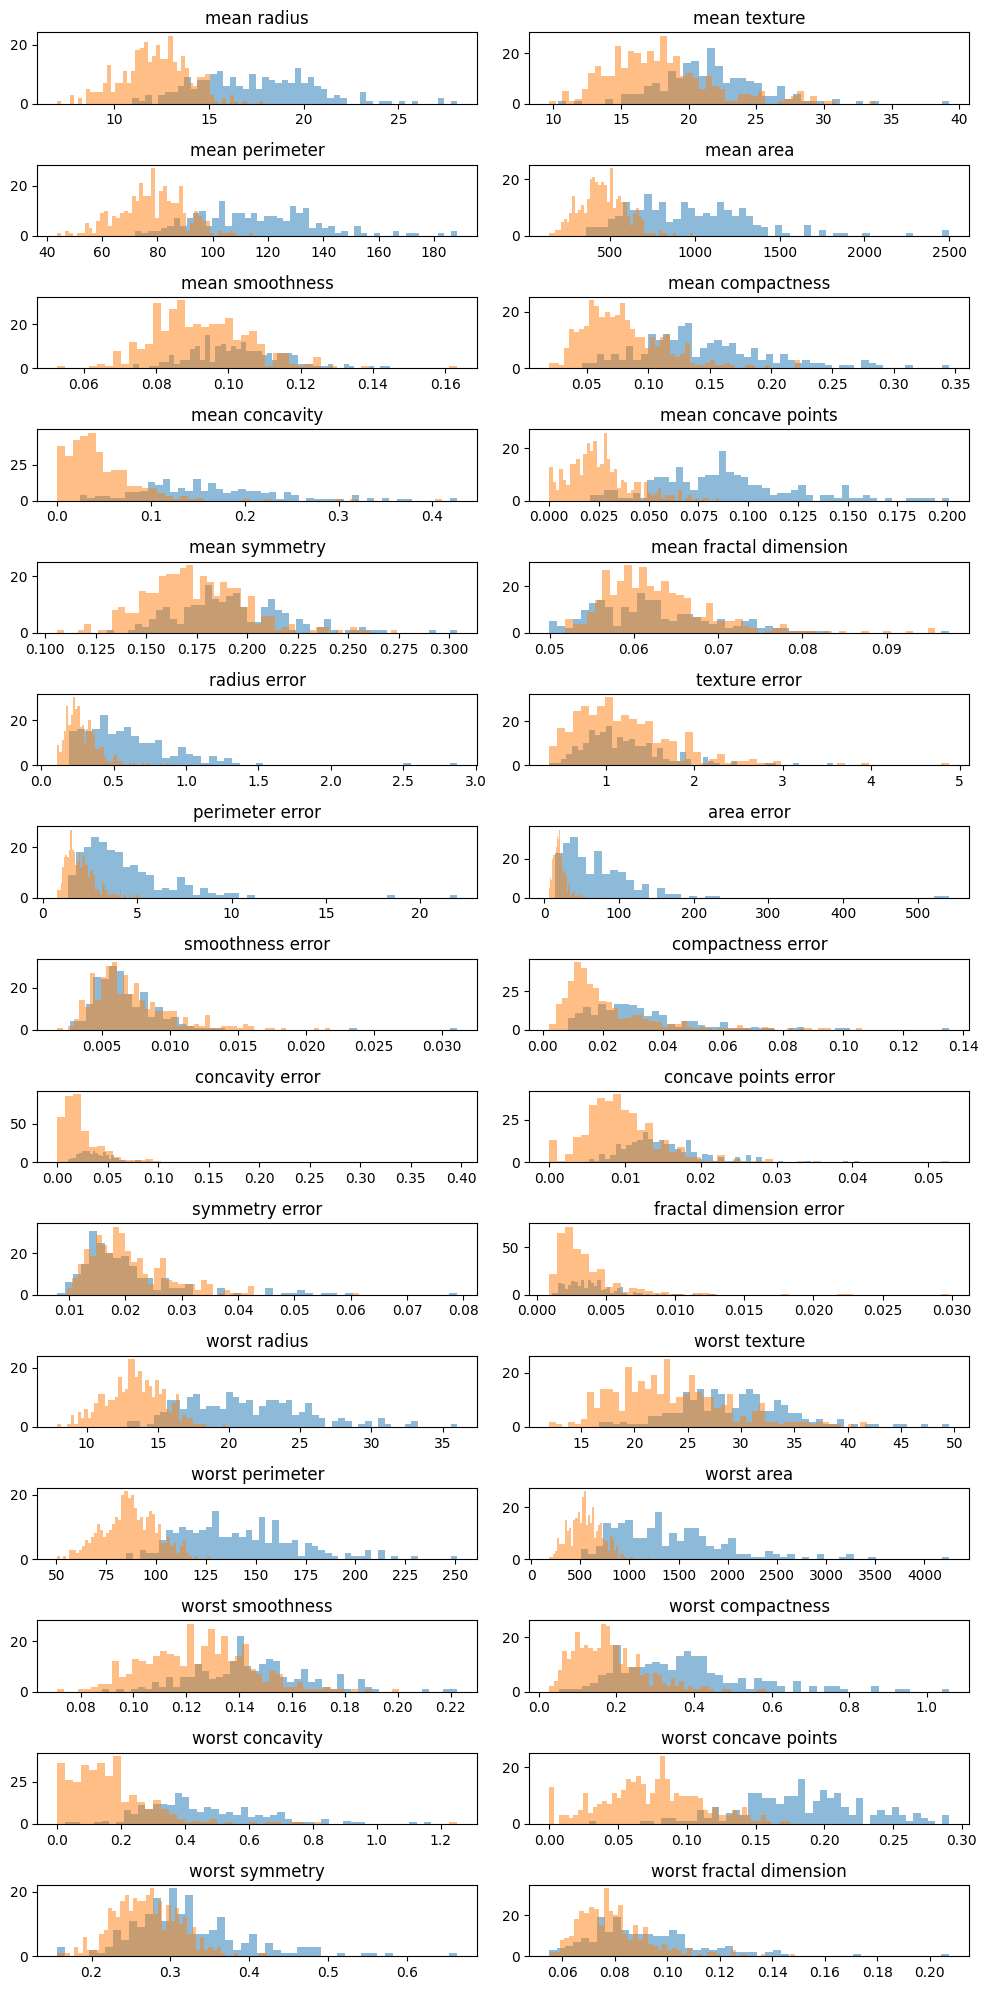

In [9]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
axes = axes.flatten() # n-차원 -> 1차원
for idx, ax in enumerate(axes):
    ax.hist(X[y==0, idx], bins=50, alpha=0.5)
    ax.hist(X[y==1, idx], bins=50, alpha=0.5)
    ax.set_title(bc_dataset['feature_names'][idx])

fig.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ssc = StandardScaler()
X_scaled = ssc.fit_transform(X_train) # PCA 적용 전에 정규분포로 변환하는 것 권장

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

X_train.shape, X_pca.shape



((426, 30), (426, 2))